# 🚀 Artificial Intelligence - 2025 | Week 4
*Unlock the Future with Intelligent Machines* 🤖✨

- **Author:** Teerapong Panboonyuen (also known as Kao Panboonyuen)
- **GitHub:** [kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1](https://github.com/kaopanboonyuen/SC310005_ArtificialIntelligence_2025s1)

# 📘 Thai Prime Ministers Face Classification - Full PyTorch Tutorial (AI Week 4)

![](https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/thai_pm_faces_lists.png)

## ✅ This notebook covers: EDA, Custom CNNs, Pretrained Models, Vision Transformer, Evaluation Metrics, Error Analysis

![](https://www.pinecone.io/_next/image/?url=https%3A%2F%2Fcdn.sanity.io%2Fimages%2Fvr8gru94%2Fproduction%2Fef2026fc131e20c7fb0b0298ab88d5e365339514-4009x1821.png&w=3840&q=75)

# ✅ DOWNLOAD DATASET (quiet mode)

In [ ]:
!wget -q --show-progress https://github.com/kaopanboonyuen/panboonyuen_dataset/raw/main/public_dataset/thai_pm_faces.zip
!unzip -q thai_pm_faces.zip -d /content/

thai_pm_faces.zip   100%[===================>]   7.40M  --.-KB/s    in 0.02s   


# ✅ SETUP SECTION

In [ ]:
# !pip install -q torch torchvision torcheval matplotlib seaborn scikit-learn

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# 📁 Step 1: Dataset Path

In [ ]:
DATA_DIR = # ADD YOUR DATASET PATH HERE

# ✅ Step 2: Transformations

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Step 3: Load Dataset

In [ ]:
full_dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
class_names = full_dataset.classes
# Write your code here (display classname)

Class names: ['abhisit', 'banharn', 'chavalit', 'prayut', 'samak', 'somchai', 'srettha', 'surayud', 'thaksin', 'yingluck']


# ✅ Step 4: Show Sample Images

In [ ]:
def show_samples(dataset, num=8):
    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    for i in range(num):
        img, label = dataset[random.randint(0, len(dataset) - 1)]
        axes[i].imshow(img.permute(1, 2, 0) * 0.5 + 0.5)
        axes[i].set_title(class_names[label])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

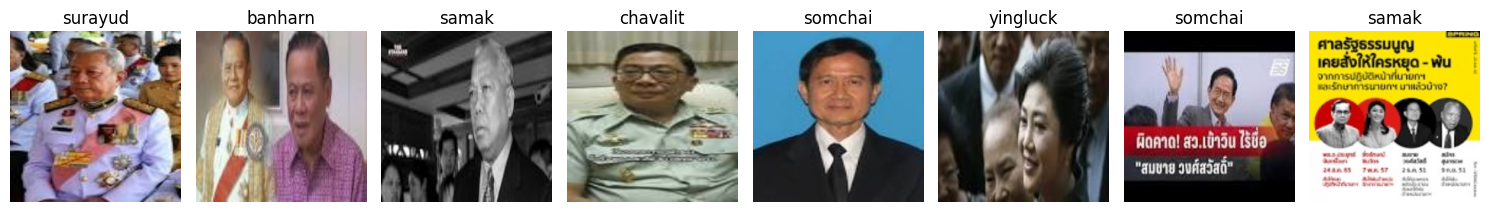

In [ ]:
# Write your code here (display sample image with label name)

# ✅ Step 5: Train/Test Split

In [ ]:
indices = list(range(len(full_dataset)))
train_indices, test_indices = train_test_split(indices, test_size=0.2, stratify=[full_dataset[i][1] for i in indices], random_state=42)

train_dataset = Subset(full_dataset, train_indices)
test_dataset = Subset(full_dataset, test_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# ✅ Step 6: Model Architectures (CustomCNN1)

In [ ]:
class CustomCNN1(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv = nn.Sequential(
            # Write your deep learning (CNN) here
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 128), nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

# 🚀 Self-attention Mechanism

Reference: https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

![](https://cdn.prod.website-files.com/62528d398a42420e66390ef9/65cd0d82d6983755c129822a_Untitled.png)

In [ ]:
class SelfAttention(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.query = nn.Linear(in_dim, in_dim)
        self.key = nn.Linear(in_dim, in_dim)
        self.value = nn.Linear(in_dim, in_dim)
        self.scale = in_dim ** 0.5

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        weights = F.softmax(q @ k.transpose(-2, -1) / self.scale, dim=-1)
        return weights @ v

class CustomCNN2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.attn = SelfAttention(32 * 56 * 56)
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 56 * 56, 256), nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1, 1).squeeze(-1)
        x = self.attn(x)
        return self.fc(x.view(x.size(0), -1))

# ✅ Step 7: Load Pretrained Models

https://arxiv.org/pdf/2010.11929

In [ ]:
pretrained_models = {
    "resnet50": models.resnet50(weights="DEFAULT"),
    "resnet101": models.resnet101(weights="DEFAULT"),
    "densenet121": models.densenet121(weights="DEFAULT"),
    "vit_b_16": models.vision_transformer.vit_b_16(weights="DEFAULT")
}

![](https://miro.medium.com/v2/resize:fit:1400/1*-WzJNLY61beEdlFmoq9FoA.png)

In [ ]:
for name, model in pretrained_models.items():
    if hasattr(model, 'fc'):
        model.fc = nn.Linear(model.fc.in_features, len(class_names))
    elif hasattr(model, 'classifier'):
        if isinstance(model.classifier, nn.Sequential):
            model.classifier[-1] = nn.Linear(model.classifier[-1].in_features, len(class_names))
        else:
            model.classifier = nn.Linear(model.classifier.in_features, len(class_names))
    elif hasattr(model, 'heads') and hasattr(model.heads, 'head'):
        model.heads.head = nn.Linear(model.heads.head.in_features, len(class_names))

# ✅ Step 8: Training + Evaluation Loop

In [ ]:
def train_eval_model(model, name, epochs=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        for imgs, labels in tqdm(train_loader, desc=f"{name} - Epoch {epoch+1}"):
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            outputs = model(imgs).cpu()
            preds = torch.argmax(outputs, dim=1)
            all_preds.append(preds)
            all_labels.append(labels)

    y_pred = torch.cat(all_preds)
    y_true = torch.cat(all_labels)
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"\n🔎 Report for {name}")
    print(classification_report(y_true, y_pred, target_names=class_names))
    print(confusion_matrix(y_true, y_pred))

    return {"model": name, "acc": acc, "pre": pre, "rec": rec, "f1": f1, "pred": y_pred, "true": y_true}

# ✅ Step 9: Run All Models

In [ ]:
results = []

results.append(train_eval_model(CustomCNN1(len(class_names)), "CustomCNN1"))
# results.append(train_eval_model(CustomCNN2(len(class_names)), "CustomCNN2")) # Self-attention Mechanism

for name, model in pretrained_models.items():
    results.append(train_eval_model(model, name))

CustomCNN1 - Epoch 3: 100%|██████████| 25/25 [00:01<00:00, 14.36it/s]



🔎 Report for CustomCNN1
              precision    recall  f1-score   support

     abhisit       1.00      0.60      0.75        20
     banharn       0.74      1.00      0.85        20
    chavalit       0.80      1.00      0.89        20
      prayut       1.00      0.85      0.92        20
       samak       1.00      1.00      1.00        20
     somchai       1.00      0.75      0.86        20
     srettha       1.00      0.90      0.95        20
     surayud       0.87      1.00      0.93        20
     thaksin       0.94      0.85      0.89        20
    yingluck       0.76      0.95      0.84        20

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.89      0.89       200

[[12  5  0  0  0  0  0  0  0  3]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  2 17  0  0  0  1  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  2  3  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  

resnet50 - Epoch 3: 100%|██████████| 25/25 [00:07<00:00,  3.38it/s]



🔎 Report for resnet50
              precision    recall  f1-score   support

     abhisit       1.00      1.00      1.00        20
     banharn       1.00      1.00      1.00        20
    chavalit       1.00      1.00      1.00        20
      prayut       1.00      1.00      1.00        20
       samak       1.00      1.00      1.00        20
     somchai       1.00      1.00      1.00        20
     srettha       1.00      1.00      1.00        20
     surayud       1.00      1.00      1.00        20
     thaksin       1.00      1.00      1.00        20
    yingluck       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 

resnet101 - Epoch 3: 100%|██████████| 25/25 [00:13<00:00,  1.92it/s]



🔎 Report for resnet101
              precision    recall  f1-score   support

     abhisit       1.00      1.00      1.00        20
     banharn       1.00      1.00      1.00        20
    chavalit       1.00      1.00      1.00        20
      prayut       1.00      1.00      1.00        20
       samak       1.00      1.00      1.00        20
     somchai       1.00      1.00      1.00        20
     srettha       1.00      1.00      1.00        20
     surayud       1.00      1.00      1.00        20
     thaksin       0.95      1.00      0.98        20
    yingluck       1.00      0.95      0.97        20

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0

densenet121 - Epoch 3: 100%|██████████| 25/25 [00:08<00:00,  3.10it/s]



🔎 Report for densenet121
              precision    recall  f1-score   support

     abhisit       1.00      1.00      1.00        20
     banharn       1.00      1.00      1.00        20
    chavalit       1.00      1.00      1.00        20
      prayut       1.00      1.00      1.00        20
       samak       1.00      1.00      1.00        20
     somchai       1.00      1.00      1.00        20
     srettha       1.00      1.00      1.00        20
     surayud       1.00      1.00      1.00        20
     thaksin       0.95      1.00      0.98        20
    yingluck       1.00      0.95      0.97        20

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0 

vit_b_16 - Epoch 3: 100%|██████████| 25/25 [00:27<00:00,  1.11s/it]



🔎 Report for vit_b_16
              precision    recall  f1-score   support

     abhisit       1.00      1.00      1.00        20
     banharn       1.00      1.00      1.00        20
    chavalit       1.00      1.00      1.00        20
      prayut       1.00      1.00      1.00        20
       samak       1.00      1.00      1.00        20
     somchai       1.00      1.00      1.00        20
     srettha       1.00      1.00      1.00        20
     surayud       1.00      1.00      1.00        20
     thaksin       1.00      1.00      1.00        20
    yingluck       1.00      1.00      1.00        20

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 

# ✅ Step 10: Scoreboard

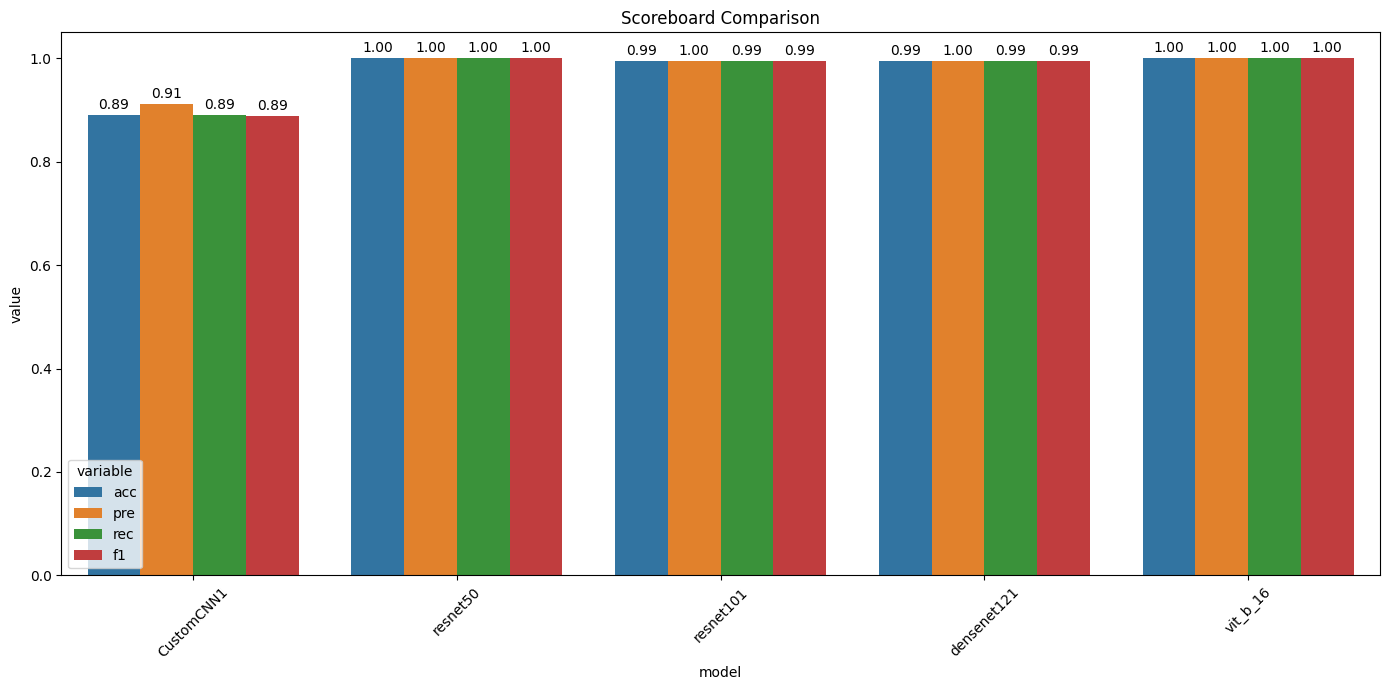

In [ ]:
import pandas as pd

# Write your code here to create the scoreboard DataFrame

melted = scoreboard.melt(id_vars=['model'], value_vars=['acc', 'pre', 'rec', 'f1'])
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=melted, x='model', y='value', hue='variable')

# Add value labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

plt.title("Scoreboard Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ✅ Step 11: Error Analysis

⚠️ No samples to show for: ❌ Misclassified Samples


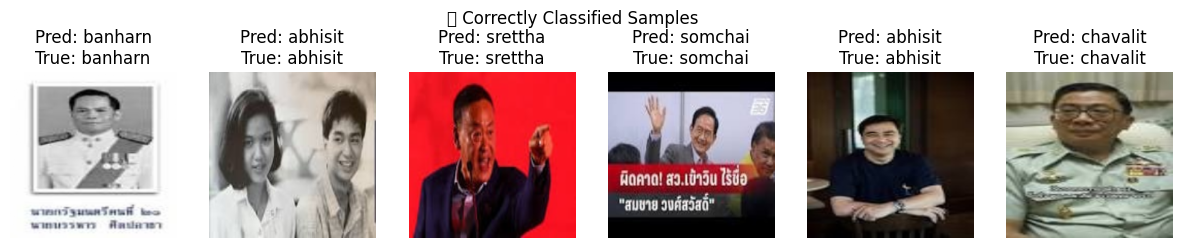

In [ ]:
final_result = max(results, key=lambda x: x['f1'])
model_name = final_result['model']
y_pred = final_result['pred']
y_true = final_result['true']

wrong = (y_pred != y_true).nonzero().squeeze()
correct = (y_pred == y_true).nonzero().squeeze()

def show_errors(indices, title):
    if len(indices) == 0:
        print(f"⚠️ No samples to show for: {title}")
        return
    fig, axes = plt.subplots(1, min(6, len(indices)), figsize=(15, 3))
    for i, idx in enumerate(indices[:6]):
        img, _ = test_dataset[idx]
        axes[i].imshow(img.permute(1, 2, 0) * 0.5 + 0.5)
        axes[i].set_title(f"Pred: {class_names[y_pred[idx]]}\nTrue: {class_names[y_true[idx]]}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

show_errors(wrong.tolist(), "❌ Misclassified Samples")
show_errors(correct.tolist(), "✅ Correctly Classified Samples")

# 🔍 Step 12: Error Analysis for CustomCNN1

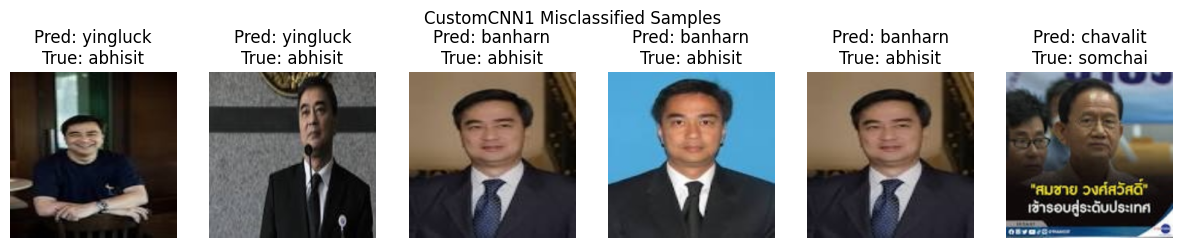

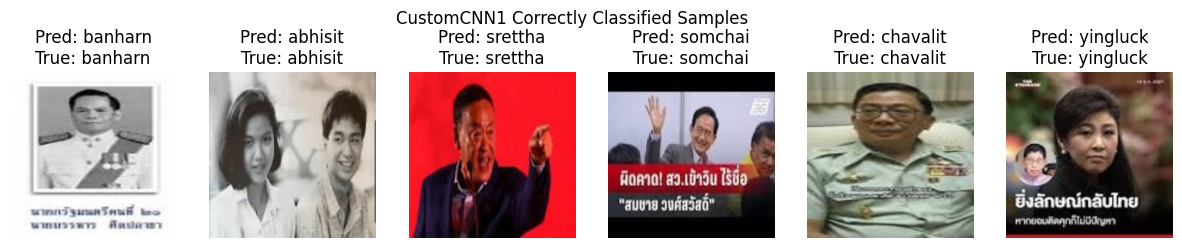

In [ ]:
custom_result = next(r for r in results if r['model'] == 'CustomCNN1')
custom_y_pred = custom_result['pred']
custom_y_true = custom_result['true']

custom_wrong = (custom_y_pred != custom_y_true).nonzero().squeeze()
custom_correct = (custom_y_pred == custom_y_true).nonzero().squeeze()

def show_custom_errors(indices, title):
    if len(indices) == 0:
        print(f"⚠️ No samples to show for: {title}")
        return
    fig, axes = plt.subplots(1, min(6, len(indices)), figsize=(15, 3))
    for i, idx in enumerate(indices[:6]):
        img, _ = test_dataset[idx]
        axes[i].imshow(img.permute(1, 2, 0) * 0.5 + 0.5)
        axes[i].set_title(f"Pred: {class_names[custom_y_pred[idx]]}\nTrue: {class_names[custom_y_true[idx]]}")
        axes[i].axis('off')
    plt.suptitle(title)
    plt.show()

show_custom_errors(custom_wrong.tolist(), "CustomCNN1 Misclassified Samples")
show_custom_errors(custom_correct.tolist(), "CustomCNN1 Correctly Classified Samples")

# 🧠 Week 4 AI Homework Summary

📌 **Task**: Find your own dataset, create a custom architecture, and baseline with 3 SOTA models (ResNet, DenseNet, Transformer) for image classification.

✅ **Steps**:

* **Dataset Selection**:

  * Find a dataset related to image classification (e.g., CIFAR-10, MNIST, or any domain-specific dataset like medical images, fashion items, etc.).

* **Custom Architecture**:

  * Design and implement a custom deep learning model suited for the chosen dataset. You can try to modify traditional architectures or create a new one based on the dataset's characteristics.

* **Model Training**:

  * Train your custom model on the dataset.
  * Tune the hyperparameters and make necessary adjustments for optimization.

* **Baseline with SOTA Models**:

  * Implement and train 3 state-of-the-art image classification models:

    * **ResNet** (Residual Networks)
    * **DenseNet** (Densely Connected Convolutional Networks)
    * **Transformer-based model** (e.g., Vision Transformer or Swin Transformer)

* **Performance Comparison**:

  * Compare the performance (accuracy, loss, etc.) of your custom architecture with the three SOTA models.
  * Visualize the results using graphs (e.g., loss curves, accuracy curves).

* 🏅 **Bonus**: Use one additional technique to improve your custom model's performance (e.g., data augmentation, transfer learning).

📄 **Full details**: See `AI-Homework-Assignment-Week-4.pdf`

📅 **Deadline**: To be confirmed during class